In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataHP = pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

In [5]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Extraemos Columnas con NAN

In [6]:
dataHP ['Alley'].isnull().mean()

0.9376712328767123

In [7]:
cols_con_na = [col for col in dataHP.columns if (dataHP [col].isnull().mean()> 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
dataHP [cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [9]:
prop_nan_per_col = dataHP [cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

Para realizar la imputación de las variables categoricas se realizara a las que tienen NAN de <= 0.06: MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond

In [160]:
cols_rescatables = [col for col in dataHP.columns if (dataHP [col].isnull().mean()<= 0.05)]
cols_rescatables

['Id',
 'MSSubClass',
 'MSZoning',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCond

#### Complete Case Analysis (CCA)

In [11]:
#dejamos solo las columnas que tiene casos completos, es decir no tienen ningún nulo.
data_HP_noNAN = dataHP[cols_rescatables].dropna()
dataHP.shape, data_HP_noNAN.shape

((1460, 81), (1412, 70))

In [60]:
col=cols_rescatables

def Histrescatables(dataHP,col):
    """Histograma para visualizar los datos con NAN y sin NAN"""
    dataHP[col].hist(bins=50, density=True, color='red',alpha=0.2)
    data_HP_noNAN[col].hist(bins=50, density=True, color='blue',alpha=0.3)
    plt.title(col)
    plt.show()

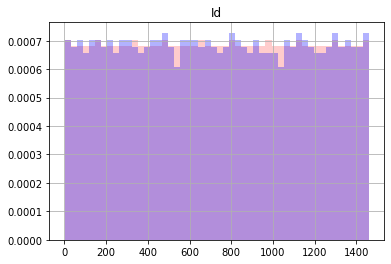

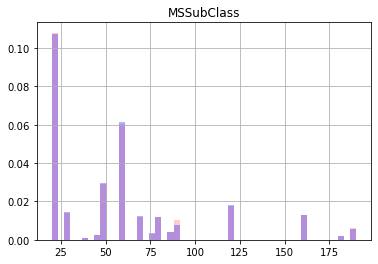

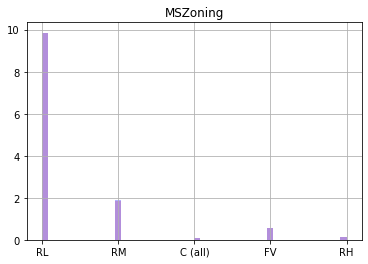

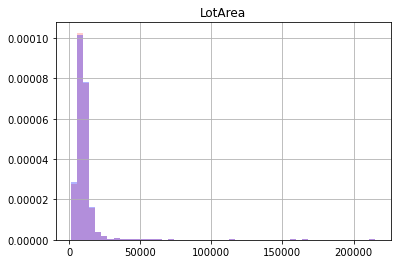

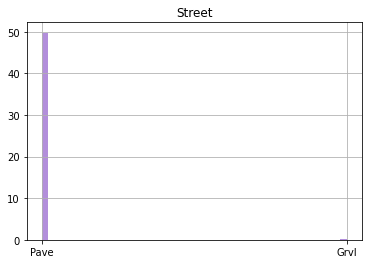

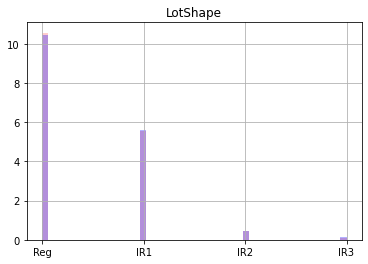

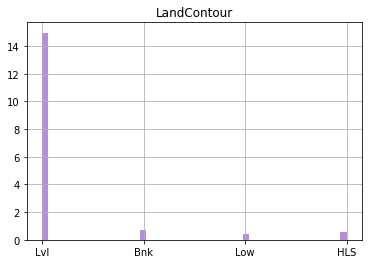

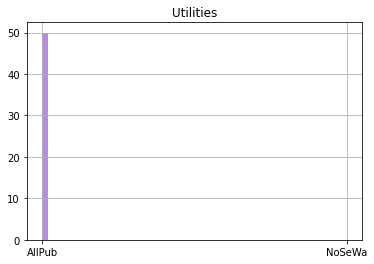

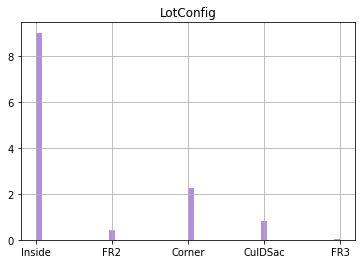

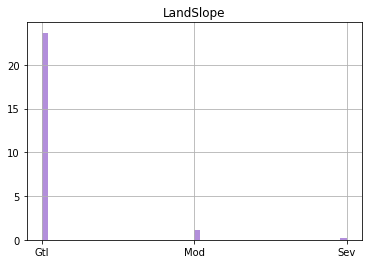

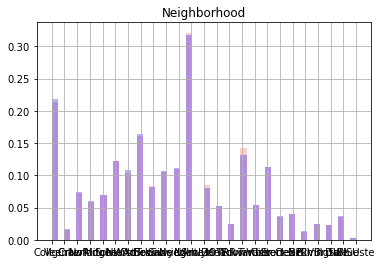

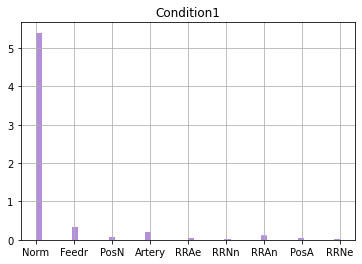

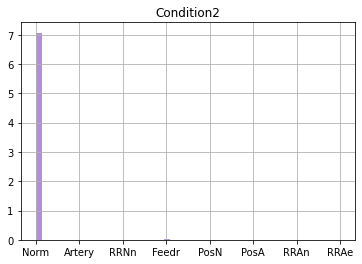

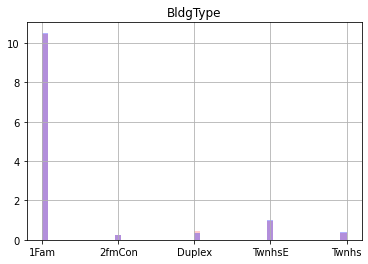

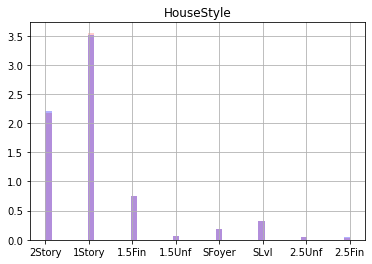

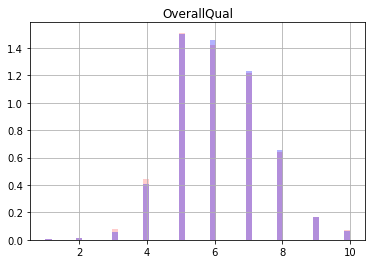

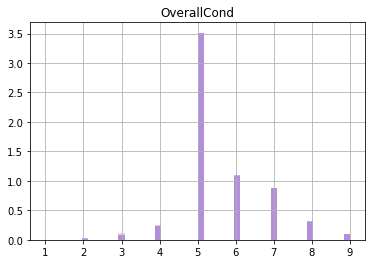

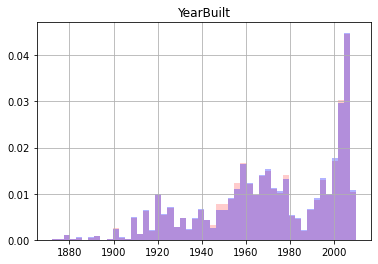

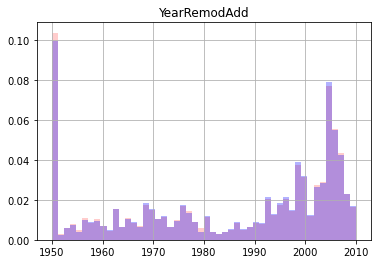

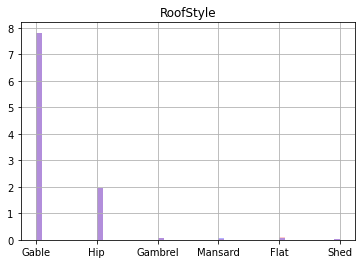

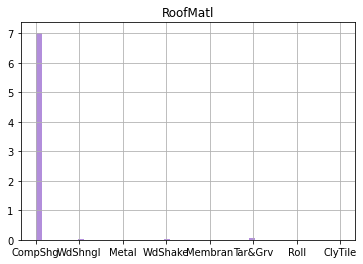

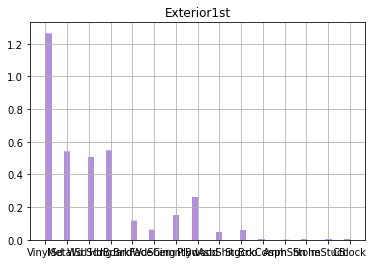

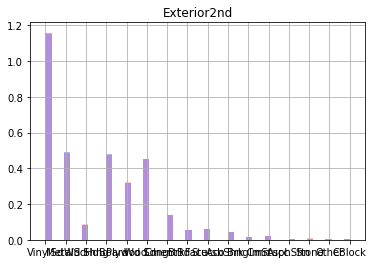

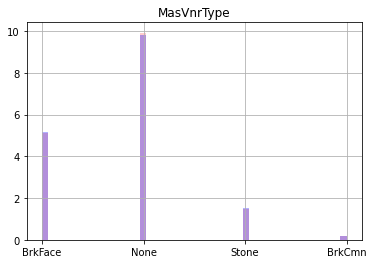

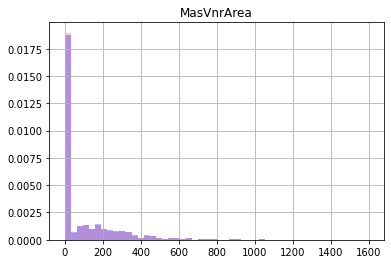

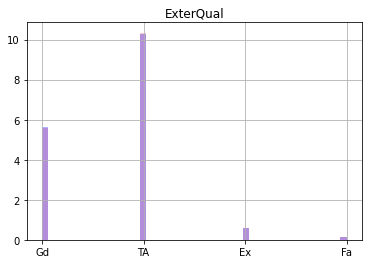

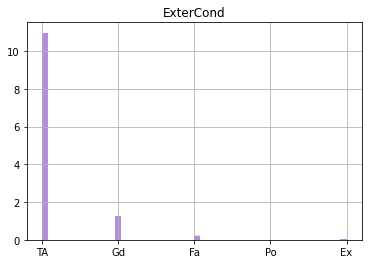

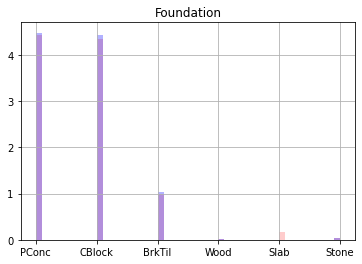

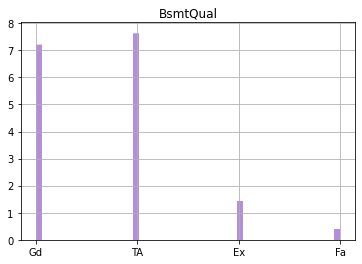

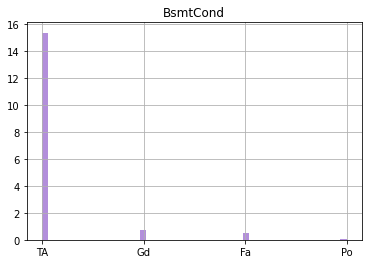

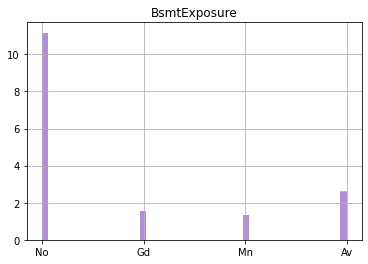

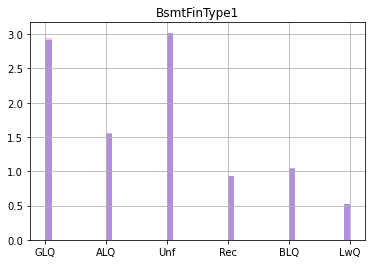

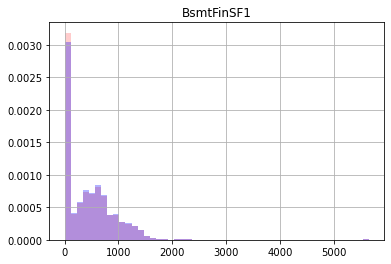

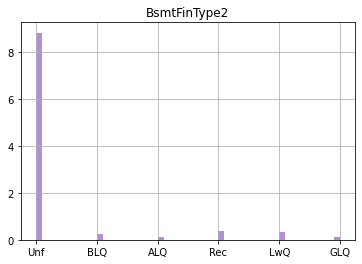

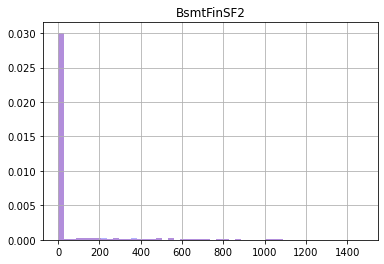

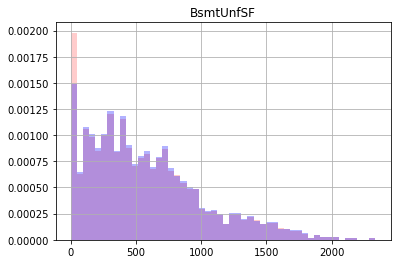

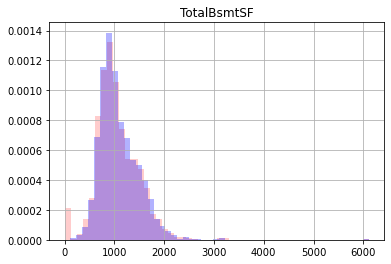

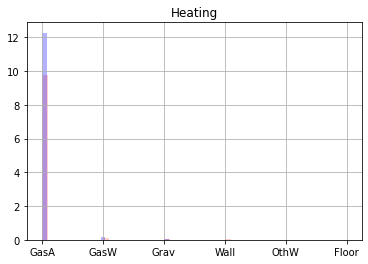

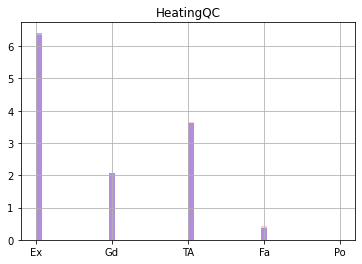

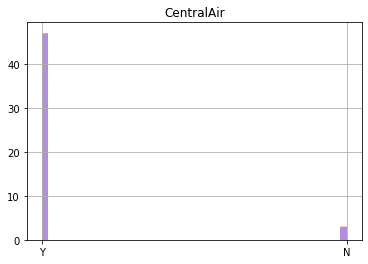

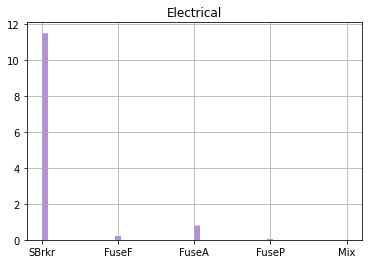

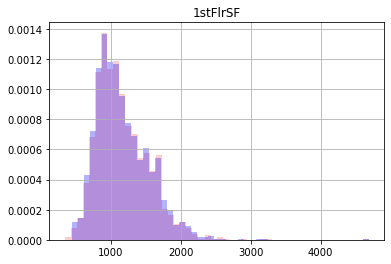

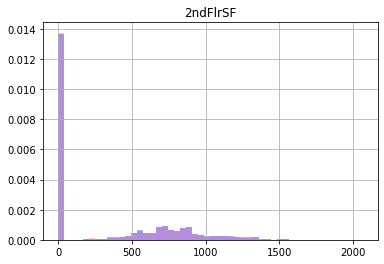

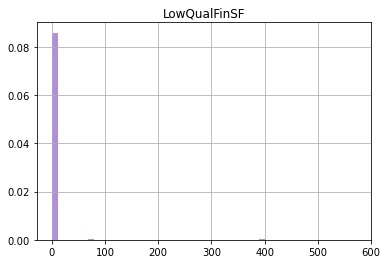

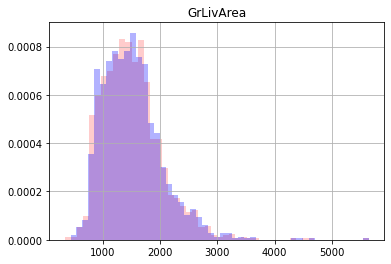

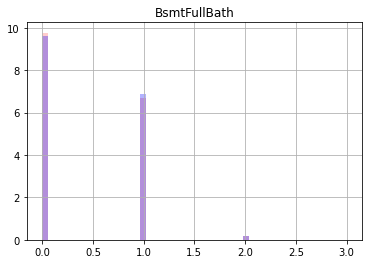

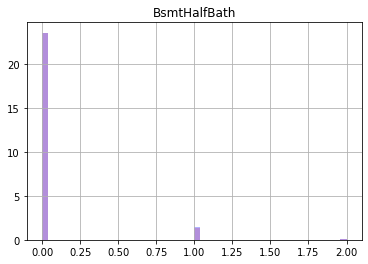

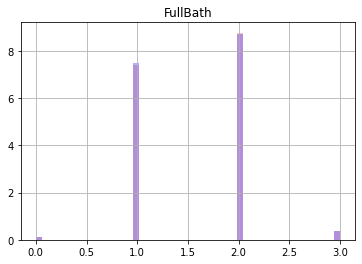

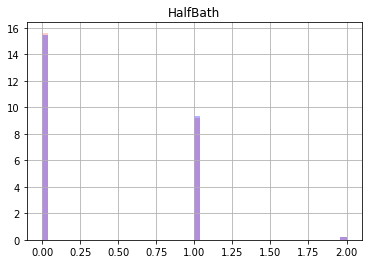

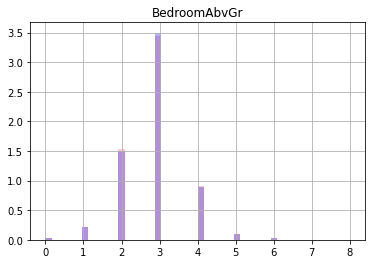

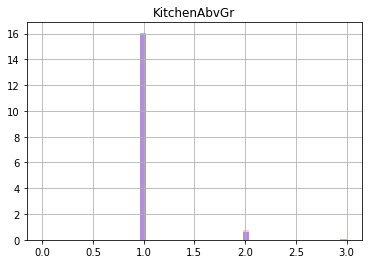

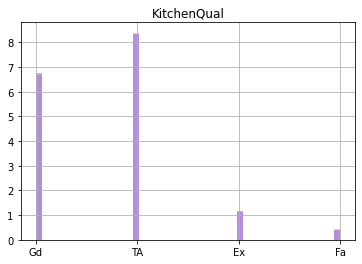

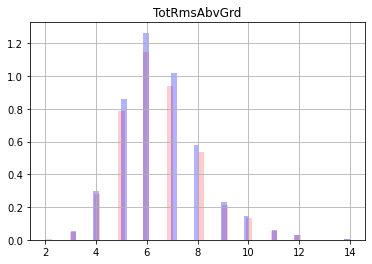

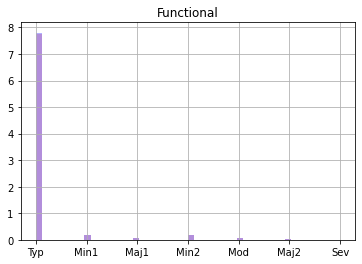

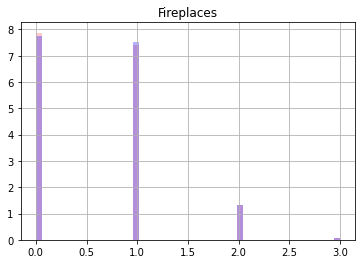

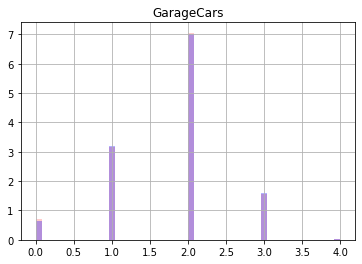

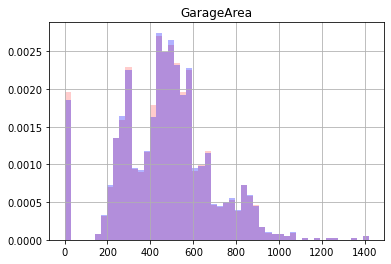

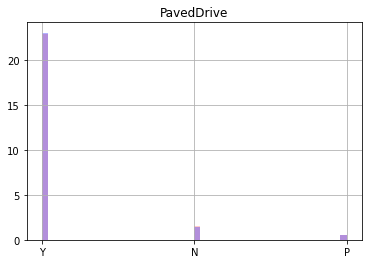

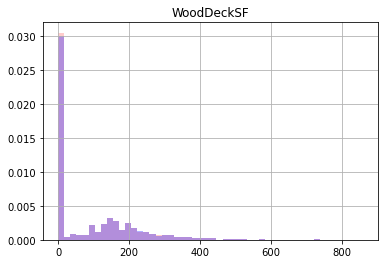

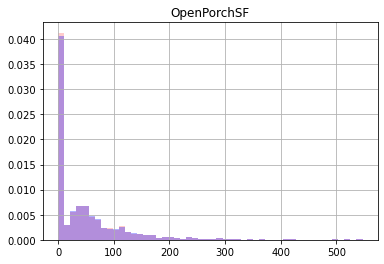

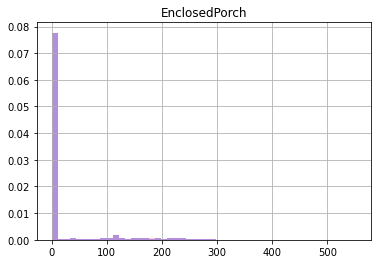

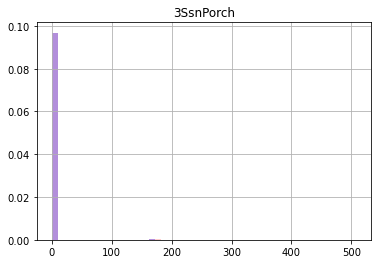

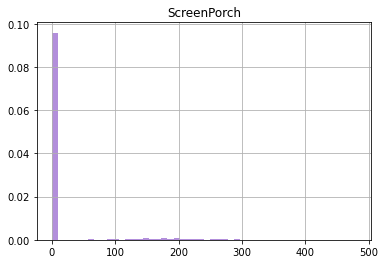

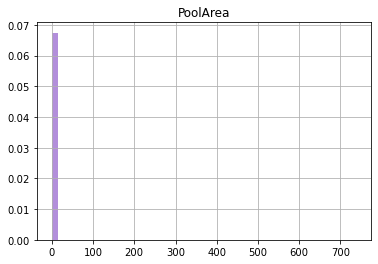

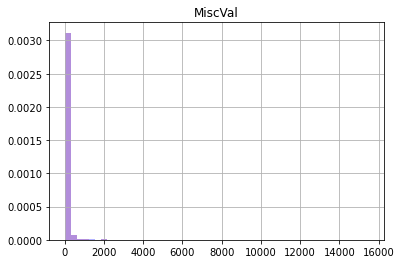

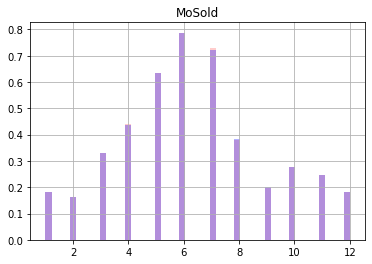

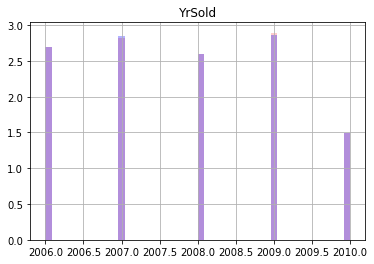

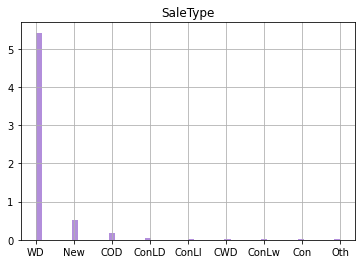

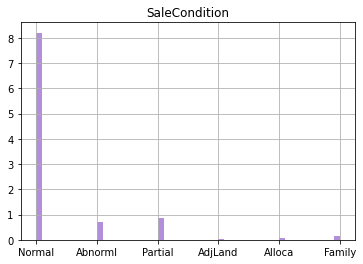

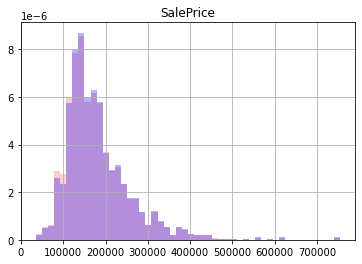

In [61]:
for col in cols_rescatables:
    Histrescatables(dataHP,col)

In [170]:
dataset_cont_missing=dataHP[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath',
'HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF',
'EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']]

In [171]:
cols_con_na = [col for col in dataset_cont_missing.columns if (dataHP [col].isnull().mean()> 0)]
cols_con_na

['MasVnrArea']

Imputación de la Media

In [177]:
media = dataHP['MasVnrArea'].mean()
mediana = dataHP['MasVnrArea'].median()

print(f"Media:{media}")
print(f"Median:{mediana}")

Media:103.68526170798899
Median:0.0


In [178]:
dataHP['MasVnrArea_Media'] = np.round(dataHP['MasVnrArea'].fillna(media))
dataHP['MasVnrArea_Mediana'] = np.round(dataHP['MasVnrArea'].fillna(mediana))

In [184]:
dataHP[['MasVnrArea','MasVnrArea_Media','MasVnrArea_Mediana']]

,MasVnrArea,MasVnrArea_Media,MasVnrArea_Mediana
0,196.0,196.0,196.0
1,0.0,0.0,0.0
2,162.0,162.0,162.0
3,0.0,0.0,0.0
4,350.0,350.0,350.0
...,...,...,...
1455,0.0,0.0,0.0
1456,119.0,119.0,119.0
1457,0.0,0.0,0.0
1458,0.0,0.0,0.0


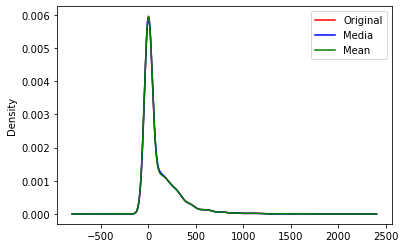

In [185]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataHP['MasVnrArea'].plot.density(color='red',label='Original')
dataHP['MasVnrArea_Media'].plot.density(color='blue',label='Media')
dataHP['MasVnrArea_Mediana'].plot.density(color='green',label='Mean')
ax.legend()

#### imputación categorica 

In [70]:
dataset_cat_missing= dataHP[['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 
                     'GarageFinish', 'GarageQual', 'GarageCond',"SalePrice"]]
dataset_cat_missing.head()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,223500
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,140000
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,250000


In [71]:
dataset_cat_missing.isnull().mean()

MasVnrType      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
SalePrice       0.000000
dtype: float64

In [85]:
dataset_cat_missing['BsmtQual'].value_counts()/len(dataset_cat_missing)

TA    0.444521
Gd    0.423288
Ex    0.082877
Fa    0.023973
Name: BsmtQual, dtype: float64

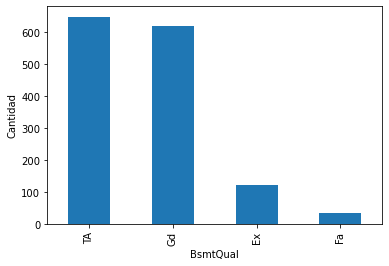

In [19]:
dataset_cat_missing['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

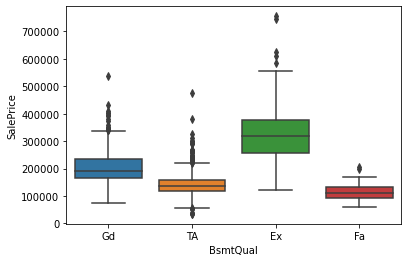

In [20]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing["BsmtQual"],y=dataset_cat_missing["SalePrice"])
plt.show()

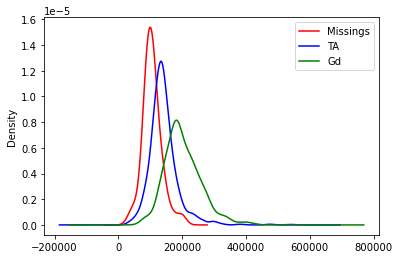

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
ax.legend()
plt.show()

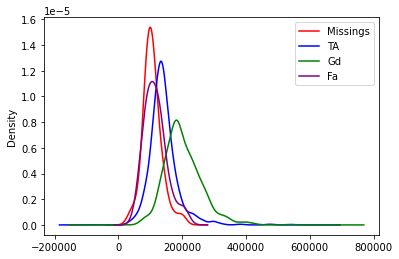

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="purple", label="Fa")
ax.legend()
plt.show()

In [23]:
dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1706462357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtQual'].fillna('Fa',inplace=True)


In [24]:
dataset_cat_missing

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000
...,...,...,...
1455,Gd,TA,175000
1456,Gd,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


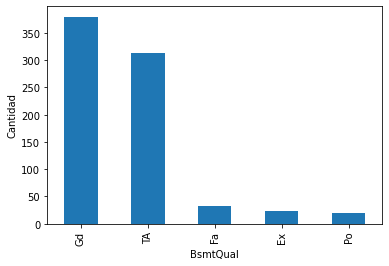

In [25]:
dataset_cat_missing['FireplaceQu'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

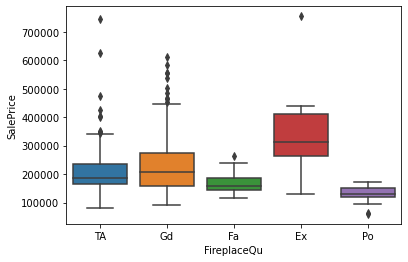

In [26]:
import seaborn as sns
sns.boxplot(x=dataset_cat_missing["FireplaceQu"],y=dataset_cat_missing["SalePrice"])
plt.show()

In [28]:
dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\4271123034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['FireplaceQu'].fillna('Po',inplace=True)


In [86]:
dataset_cat_missing['MasVnrType'].value_counts()/len(dataset_cat_missing)

None       0.591781
BrkFace    0.304795
Stone      0.087671
BrkCmn     0.010274
Name: MasVnrType, dtype: float64

In [98]:
dataset: dataset_cat_missing
col: dataset_cat_missing

def plot_cat_missing (dataset, col):
    dataset_cat_missing[col].value_counts().plot.bar()
    plt.ylabel("Cantidad")
    plt.xlabel(col)
    plt.title(col)
    plt.show()

    import seaborn as sns
    sns.boxplot(x=dataset_cat_missing[col],y=dataset_cat_missing["SalePrice"])
    plt.title(col)
    plt.show()

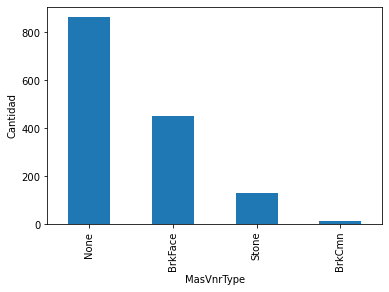

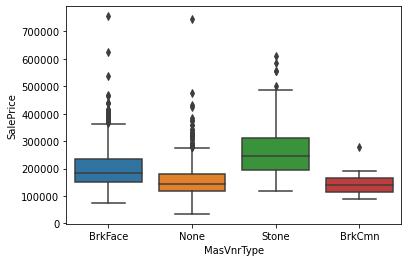

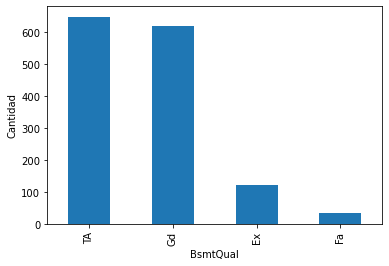

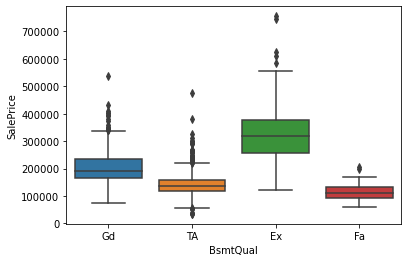

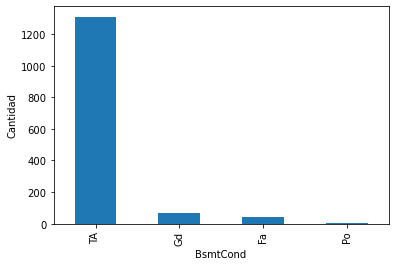

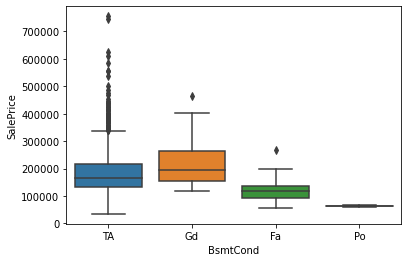

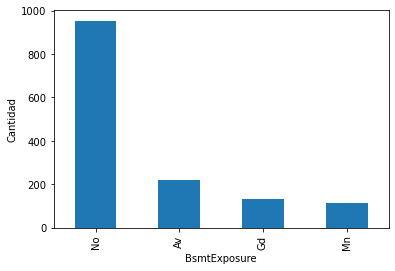

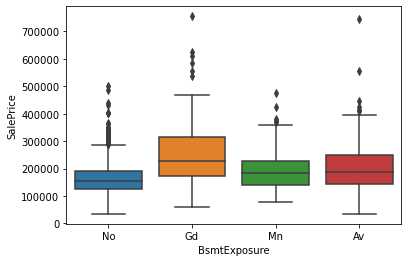

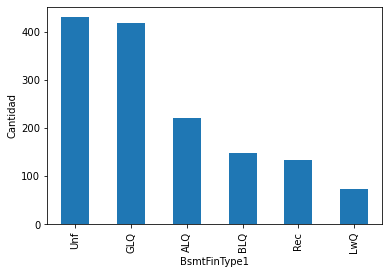

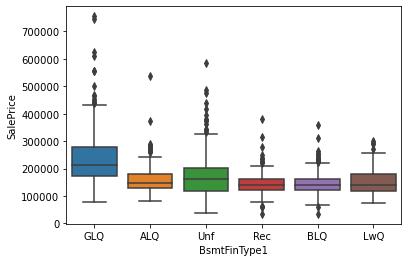

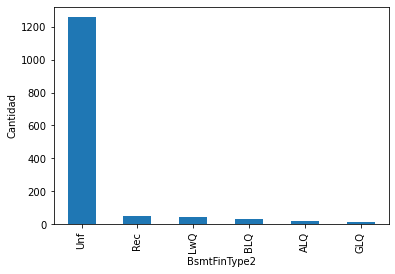

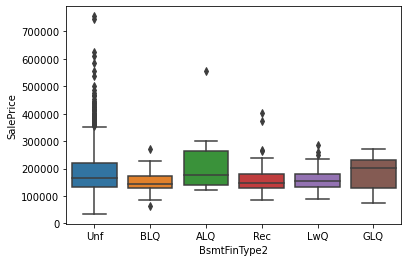

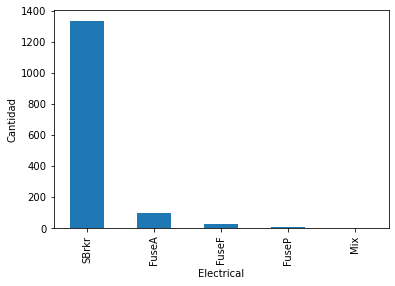

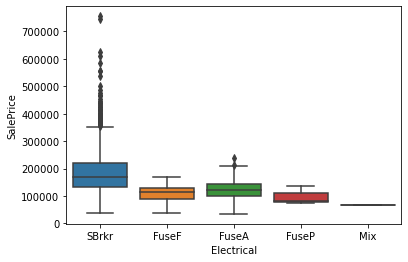

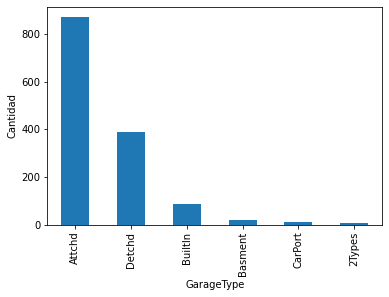

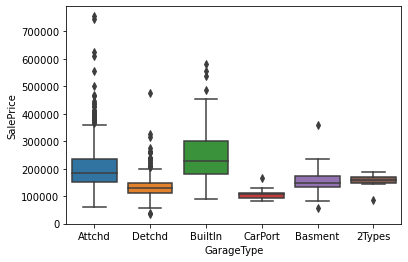

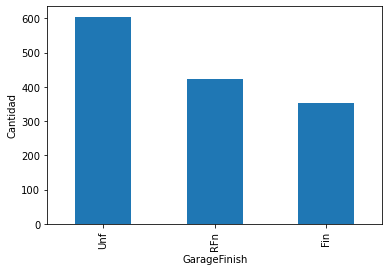

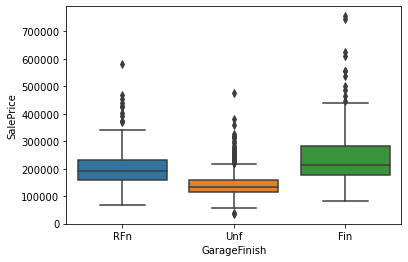

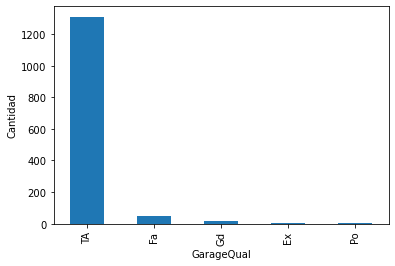

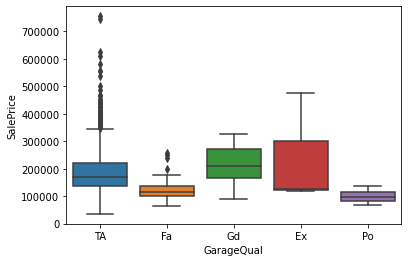

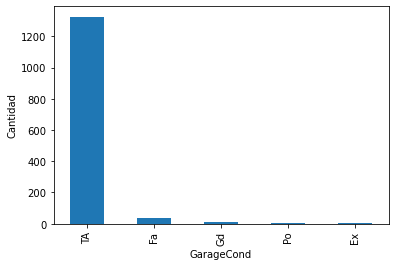

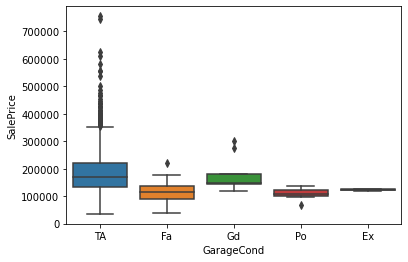

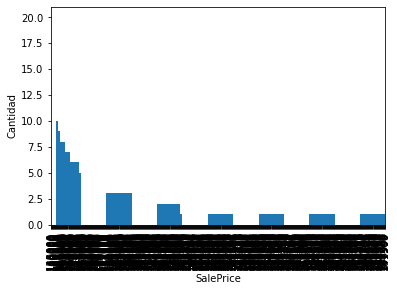

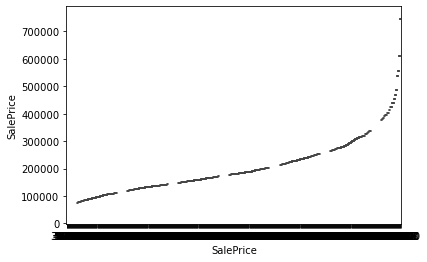

In [97]:
for col in dataset_cat_missing:
    plot_cat_missing(dataset,col)

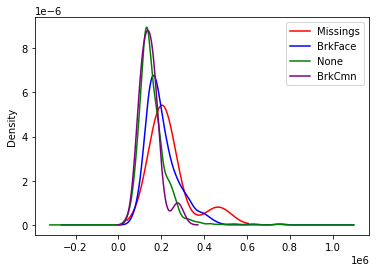

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['MasVnrType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkFace']['SalePrice'].plot(kind="kde", color="blue", label="BrkFace")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'None']['SalePrice'].plot(kind="kde", color="green", label="None")
dataset_cat_missing[dataset_cat_missing['MasVnrType'] == 'BrkCmn']['SalePrice'].plot(kind="kde", color="purple", label="BrkCmn")
ax.legend()
plt.show()

Se tomo los datos de BrkFace para la imputación, debido a que es el dato con una asimetria cercana a los datos faltantes

In [91]:
dataset_cat_missing['MasVnrType'].fillna('BrkFace',inplace=True)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2460077992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['MasVnrType'].fillna('BrkFace',inplace=True)


In [92]:
dataset_cat_missing['BsmtCond'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Gd    0.044521
Fa    0.030822
Po    0.001370
Name: BsmtCond, dtype: float64

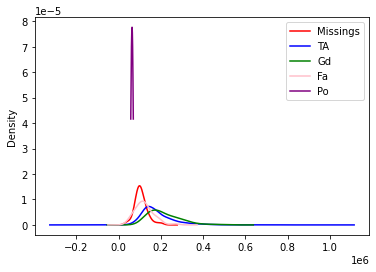

In [102]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="pink", label="Fa")
dataset_cat_missing[dataset_cat_missing['BsmtCond'] == 'Po']['SalePrice'].plot(kind="kde", color="purple", label="Po")
ax.legend()
plt.show()


In [103]:
dataset_cat_missing['BsmtExposure'].value_counts()/len(dataset_cat_missing)

No    0.652740
Av    0.151370
Gd    0.091781
Mn    0.078082
Name: BsmtExposure, dtype: float64

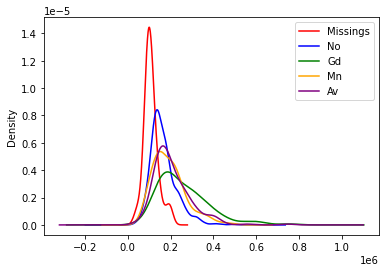

In [107]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtExposure'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'No']['SalePrice'].plot(kind="kde", color="blue", label="No")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Gd']['SalePrice'].plot(kind="kde", color="green", label="Gd")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Mn']['SalePrice'].plot(kind="kde", color="orange", label="Mn")
dataset_cat_missing[dataset_cat_missing['BsmtExposure'] == 'Av']['SalePrice'].plot(kind="kde", color="purple", label="Av")
ax.legend()
plt.show()


In [108]:
dataset_cat_missing['BsmtFinType1'].value_counts()/len(dataset_cat_missing)

Unf    0.294521
GLQ    0.286301
ALQ    0.150685
BLQ    0.101370
Rec    0.091096
LwQ    0.050685
Name: BsmtFinType1, dtype: float64

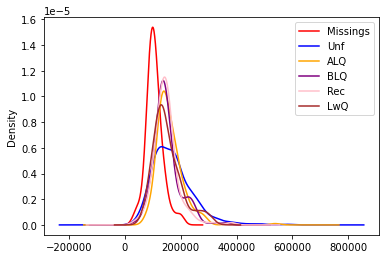

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="pink", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType1'] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")
ax.legend()
plt.show()


In [111]:
dataset_cat_missing['BsmtFinType2'].value_counts()/len(dataset_cat_missing)

Unf    0.860274
Rec    0.036986
LwQ    0.031507
BLQ    0.022603
ALQ    0.013014
GLQ    0.009589
Name: BsmtFinType2, dtype: float64

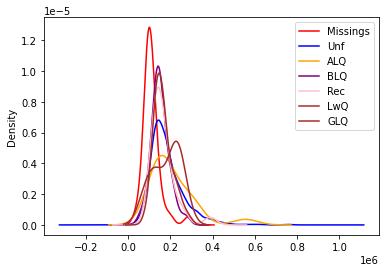

In [114]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['BsmtFinType2'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'BLQ']['SalePrice'].plot(kind="kde", color="purple", label="BLQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'Rec']['SalePrice'].plot(kind="kde", color="pink", label="Rec")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'LwQ']['SalePrice'].plot(kind="kde", color="brown", label="LwQ")
dataset_cat_missing[dataset_cat_missing['BsmtFinType2'] == 'GLQ']['SalePrice'].plot(kind="kde", color="brown", label="GLQ")
ax.legend()
plt.show()

In [113]:
dataset_cat_missing['Electrical'].value_counts()/len(dataset_cat_missing)

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.000685
Name: Electrical, dtype: float64

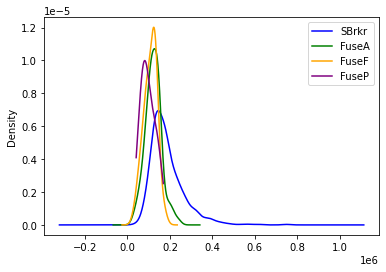

In [120]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['Electrical'] == 'SBrkr']['SalePrice'].plot(kind="kde", color="blue", label="SBrkr")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseA']['SalePrice'].plot(kind="kde", color="green", label="FuseA")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseF']['SalePrice'].plot(kind="kde", color="orange", label="FuseF")
dataset_cat_missing[dataset_cat_missing['Electrical'] == 'FuseP']['SalePrice'].plot(kind="kde", color="purple", label="FuseP")
ax.legend()
plt.show()

In [121]:
dataset_cat_missing['GarageType'].value_counts()/len(dataset_cat_missing)

Attchd     0.595890
Detchd     0.265068
BuiltIn    0.060274
Basment    0.013014
CarPort    0.006164
2Types     0.004110
Name: GarageType, dtype: float64

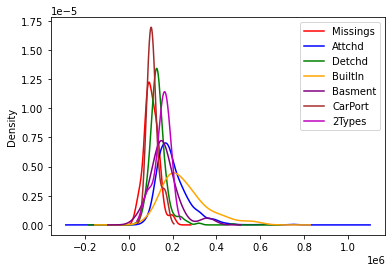

In [123]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="blue", label="Attchd")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="green", label="Detchd")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="orange", label="BuiltIn")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="purple", label="Basment")
dataset_cat_missing[dataset_cat_missing['GarageType'] == 'CarPort']['SalePrice'].plot(kind="kde", color="brown", label="CarPort")
dataset_cat_missing[dataset_cat_missing['GarageType'] == '2Types']['SalePrice'].plot(kind="kde", color="m", label="2Types")
ax.legend()
plt.show()


In [124]:
dataset_cat_missing['GarageFinish'].value_counts()/len(dataset_cat_missing)

Unf    0.414384
RFn    0.289041
Fin    0.241096
Name: GarageFinish, dtype: float64

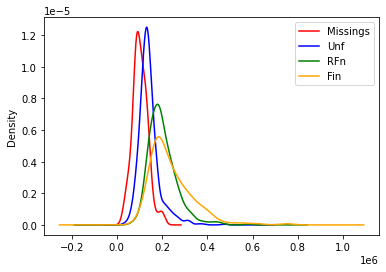

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="green", label="RFn")
dataset_cat_missing[dataset_cat_missing['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="orange", label="Fin")
ax.legend()
plt.show()

In [126]:
dataset_cat_missing['GarageQual'].value_counts()/len(dataset_cat_missing)

TA    0.897945
Fa    0.032877
Gd    0.009589
Ex    0.002055
Po    0.002055
Name: GarageQual, dtype: float64

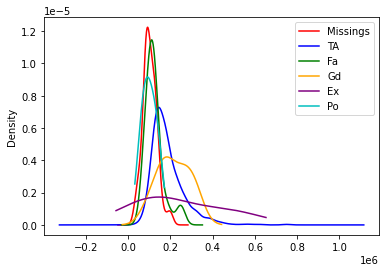

In [131]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageQual'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Ex']['SalePrice'].plot(kind="kde", color="purple", label="Ex")
dataset_cat_missing[dataset_cat_missing['GarageQual'] == 'Po']['SalePrice'].plot(kind="kde", color="c", label="Po")
ax.legend()
plt.show()


In [128]:
dataset_cat_missing['GarageCond'].value_counts()/len(dataset_cat_missing)

TA    0.908219
Fa    0.023973
Gd    0.006164
Po    0.004795
Ex    0.001370
Name: GarageCond, dtype: float64

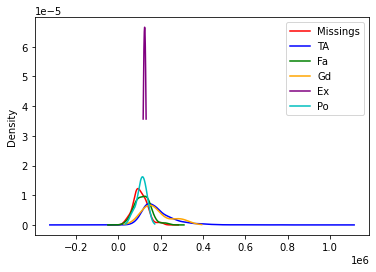

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)

dataset_cat_missing[dataset_cat_missing['GarageCond'].isnull()]['SalePrice'].plot(kind="kde", color="red", label="Missings")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'TA']['SalePrice'].plot(kind="kde", color="blue", label="TA")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Fa']['SalePrice'].plot(kind="kde", color="green", label="Fa")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Gd']['SalePrice'].plot(kind="kde", color="orange", label="Gd")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Ex']['SalePrice'].plot(kind="kde", color="purple", label="Ex")
dataset_cat_missing[dataset_cat_missing['GarageCond'] == 'Po']['SalePrice'].plot(kind="kde", color="c", label="Po")
ax.legend()
plt.show()

Se realizara la imputación de las variables según análisis realizado en los, se verifico la curva de la asimetria de los valores nullos y se realizara la imputación de la variable más proxima, la variable Electrical no muestra valores nullos en el plot

In [134]:
dataset_cat_missing['BsmtCond'].fillna('Fa',inplace=True)
dataset_cat_missing['BsmtExposure'].fillna('No',inplace=True)
dataset_cat_missing['BsmtFinType1'].fillna('Rec',inplace=True)
dataset_cat_missing['BsmtFinType2'].fillna('BLQ',inplace=True)
dataset_cat_missing['GarageType'].fillna('CarPort',inplace=True)
dataset_cat_missing['GarageQual'].fillna('Fa',inplace=True)
dataset_cat_missing['GarageFinish'].fillna('Unf',inplace=True)
dataset_cat_missing['GarageCond'].fillna('Po',inplace=True)

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\497018502.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtCond'].fillna('Fa',inplace=True)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\497018502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cat_missing['BsmtExposure'].fillna('No',inplace=True)
C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\497018502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-v

In [135]:
dataset_cat_missing

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond,SalePrice
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,208500
1,None,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,RFn,TA,TA,181500
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,223500
3,None,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,Unf,TA,TA,140000
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,Gd,TA,No,Unf,Unf,SBrkr,Attchd,RFn,TA,TA,175000
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,Attchd,Unf,TA,TA,210000
1457,None,TA,Gd,No,GLQ,Unf,SBrkr,Attchd,RFn,TA,TA,266500
1458,None,TA,TA,Mn,GLQ,Rec,FuseA,Attchd,Unf,TA,TA,142125


## Codificación de variables categoricas

In [136]:
def getCategoryVars(dataset):
     cat_colnames = []
     colnames = dataset.columns
     for col in colnames:
          if(dataset[col].dtype == 'object'):
               cat_colnames.append(col)
     return cat_colnames    

In [137]:
cat_cols=getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [138]:
cat_cols.append('SalePrice')

In [139]:
dataset_categories=dataHP[cat_cols]
dataset_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000


In [140]:
dataset_categories['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [141]:
pd.get_dummies(dataset_categories['MSZoning'])

,C (all),FV,RH,RL,RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1455,0,0,0,1,0
1456,0,0,0,1,0
1457,0,0,0,1,0
1458,0,0,0,1,0


In [142]:
dataset_categories.info

<bound method DataFrame.info of      MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl

In [143]:
dfTemp=pd.get_dummies(dataset_categories)
dfTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 253 entries, SalePrice to SaleCondition_Partial
dtypes: int64(1), uint8(252)
memory usage: 370.8 KB


In [144]:
##Frequency Encoding

dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [151]:
dataset:dataset_categories
col: dataset_categories

def Boxplt_cateories(dataset,col):
    sns.boxplot(x=dataset_categories['KitchenQual'], y=dataset_categories['SalePrice'])
    plt.title(col)
    plt.show()

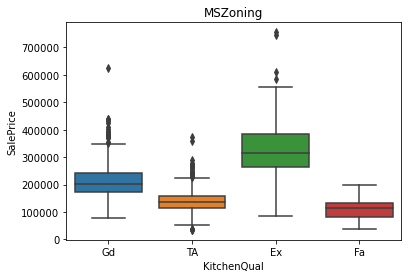

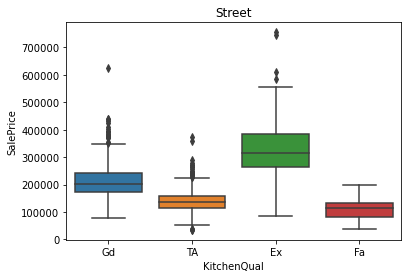

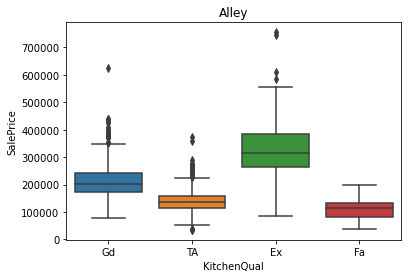

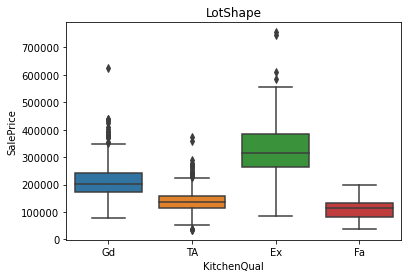

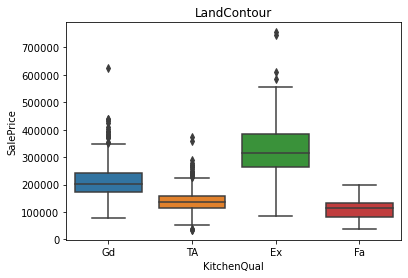

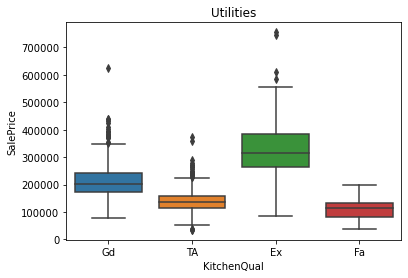

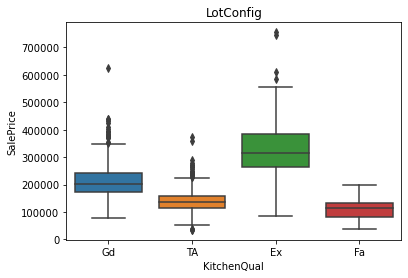

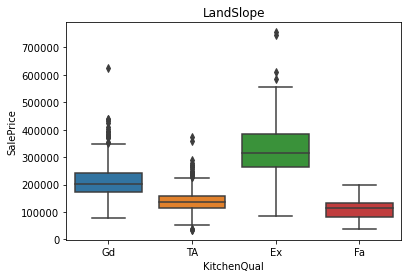

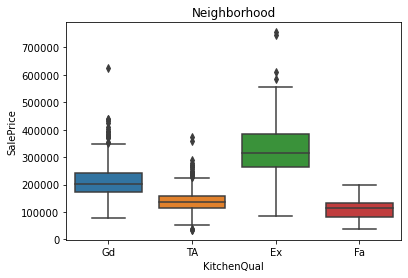

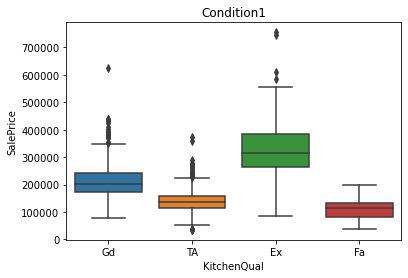

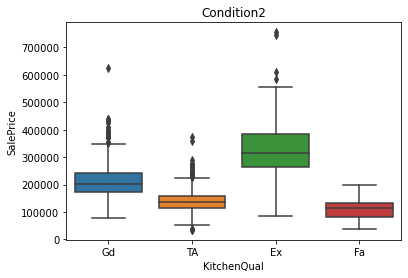

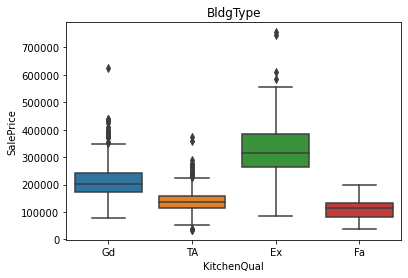

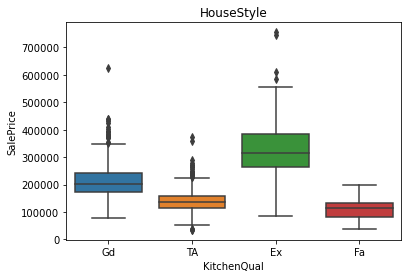

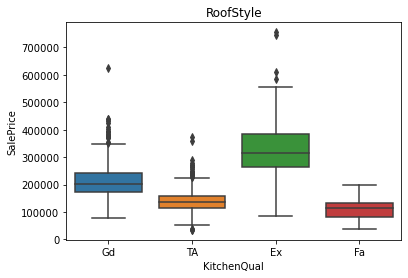

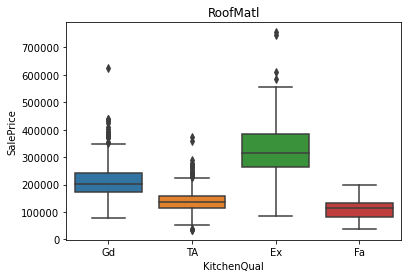

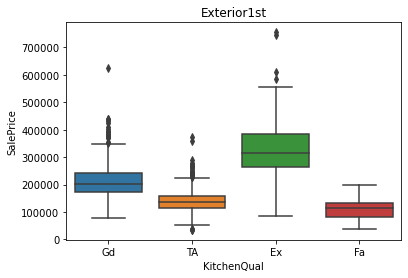

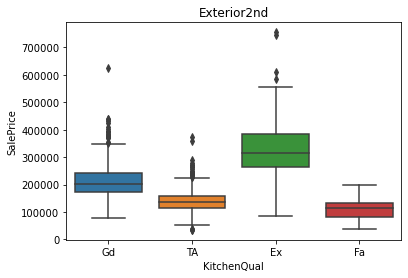

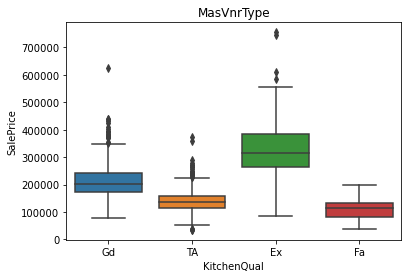

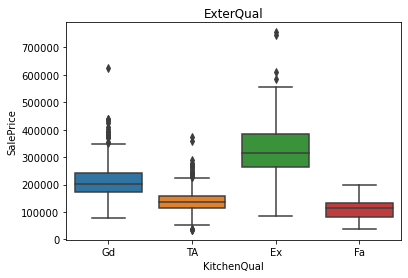

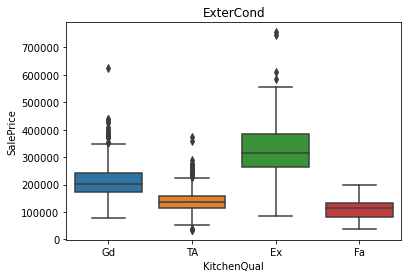

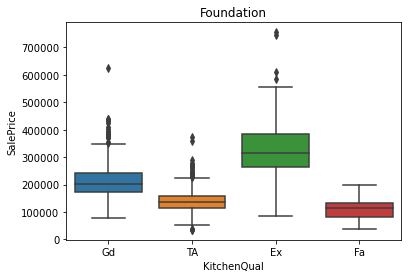

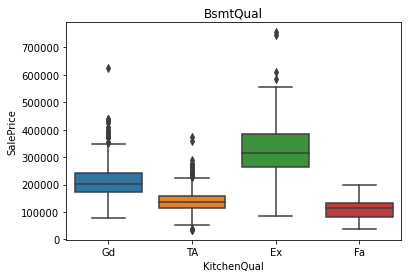

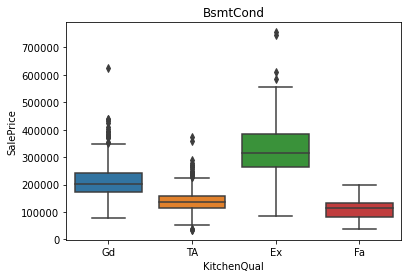

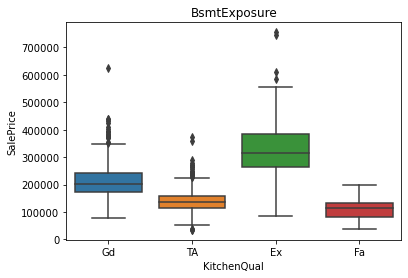

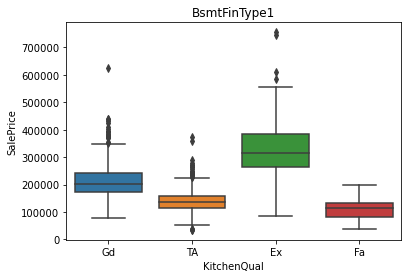

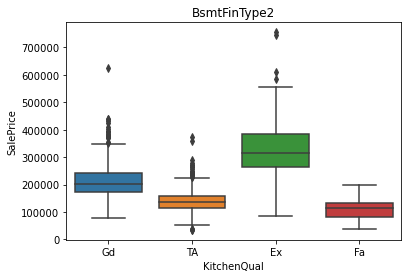

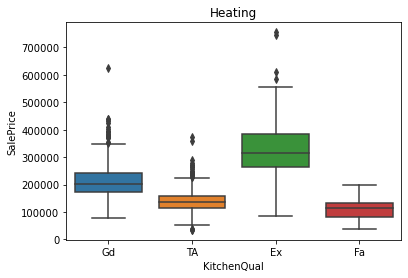

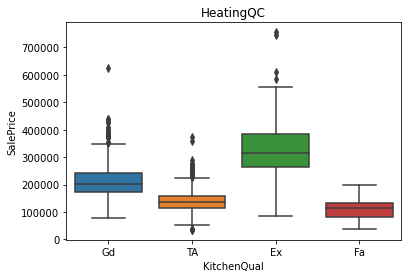

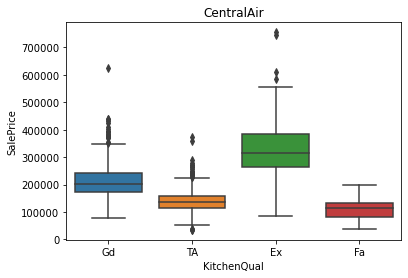

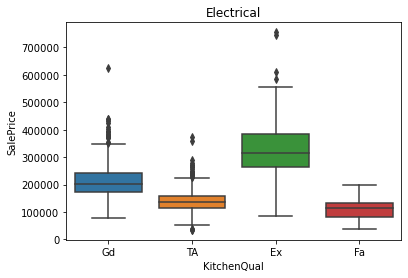

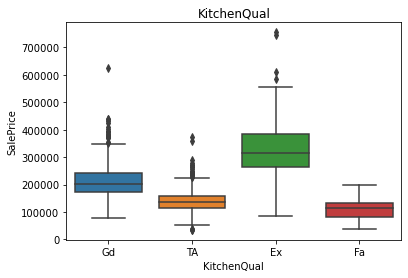

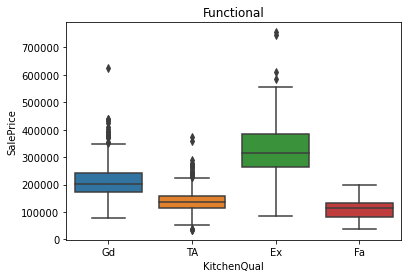

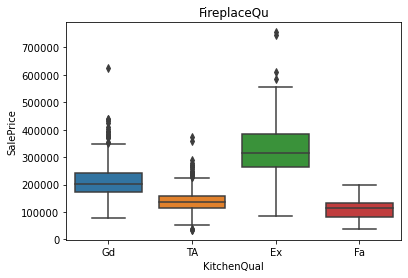

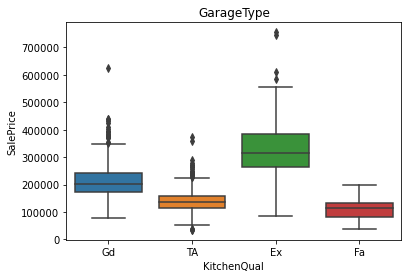

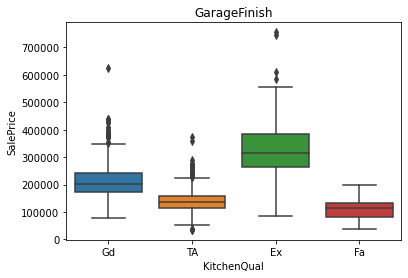

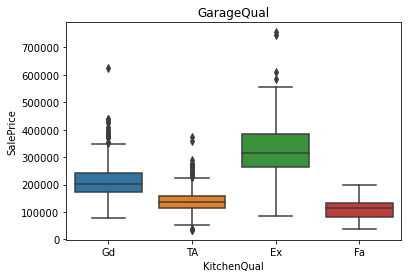

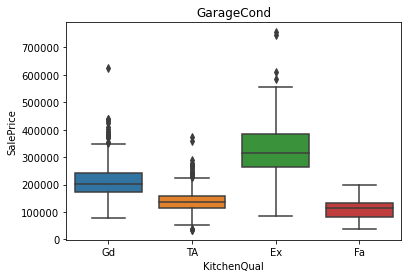

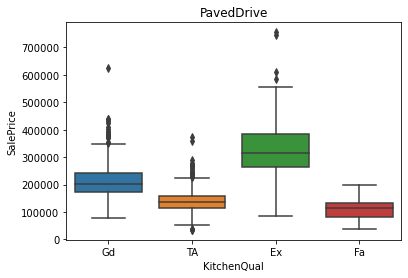

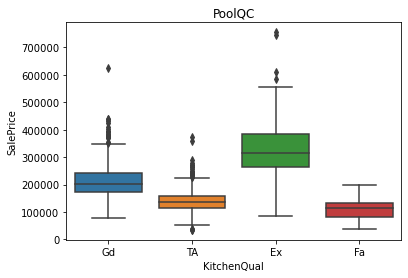

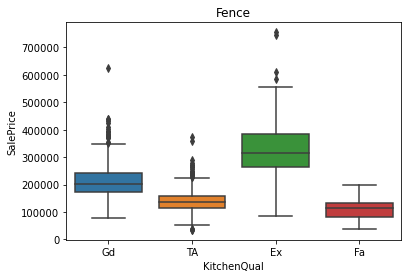

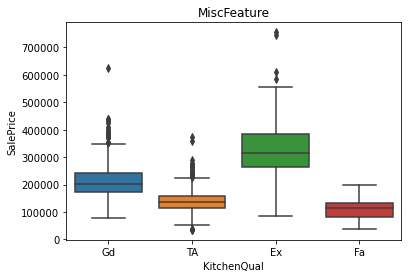

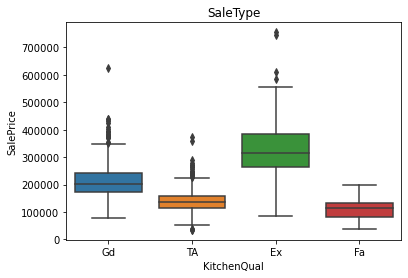

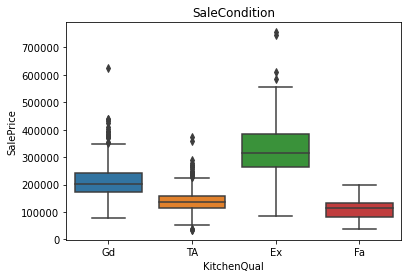

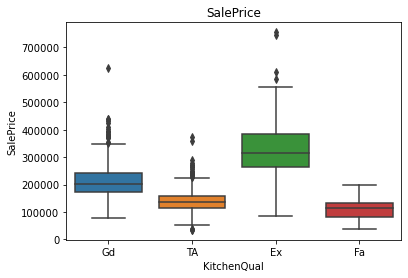

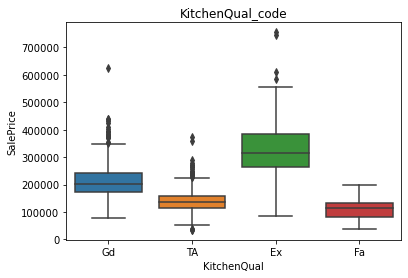

In [152]:
for col in dataset_categories:
    Boxplt_cateories(dataset,col)


Eliminar columna con mayor cantidad de valores nulos: Alley 0.937671, PoolQC 0.995205, Fence  0.807534 y MiscFeature 0.963014


In [217]:
dataHP.drop(['Alley','PoolQC','Fence','MiscFeature'], axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrArea_1,MasVnrArea_Media,MasVnrArea_Mediana
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2008,WD,Normal,208500,196.0,196.0,196.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,5,2007,WD,Normal,181500,0.0,0.0,0.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,9,2008,WD,Normal,223500,162.0,162.0,162.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,2,2006,WD,Abnorml,140000,0.0,0.0,0.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,12,2008,WD,Normal,250000,350.0,350.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,8,2007,WD,Normal,175000,0.0,0.0,0.0
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,2,2010,WD,Normal,210000,119.0,119.0,119.0
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,2500,5,2010,WD,Normal,266500,0.0,0.0,0.0
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,2010,WD,Normal,142125,0.0,0.0,0.0


In [157]:
dataset=dataset_categories
col=dataset_categories

def Freq_mapper (dataset, col):
    Freq_mapper = (dataset_categories[col].value_counts().sort_values(ascending=False)).to_dict()
    print(Freq_mapper)

In [198]:
for col in dataset_categories:
    Freq_mapper(dataset,col)
    print(col)

{'RL': 1151, 'RM': 218, 'FV': 65, 'RH': 16, 'C (all)': 10}
MSZoning
{'Pave': 1454, 'Grvl': 6}
Street
{'Grvl': 50, 'Pave': 41}
Alley
{'Reg': 925, 'IR1': 484, 'IR2': 41, 'IR3': 10}
LotShape
{'Lvl': 1311, 'Bnk': 63, 'HLS': 50, 'Low': 36}
LandContour
{'AllPub': 1459, 'NoSeWa': 1}
Utilities
{'Inside': 1052, 'Corner': 263, 'CulDSac': 94, 'FR2': 47, 'FR3': 4}
LotConfig
{'Gtl': 1382, 'Mod': 65, 'Sev': 13}
LandSlope
{'NAmes': 225, 'CollgCr': 150, 'OldTown': 113, 'Edwards': 100, 'Somerst': 86, 'Gilbert': 79, 'NridgHt': 77, 'Sawyer': 74, 'NWAmes': 73, 'SawyerW': 59, 'BrkSide': 58, 'Crawfor': 51, 'Mitchel': 49, 'NoRidge': 41, 'Timber': 38, 'IDOTRR': 37, 'ClearCr': 28, 'StoneBr': 25, 'SWISU': 25, 'MeadowV': 17, 'Blmngtn': 17, 'BrDale': 16, 'Veenker': 11, 'NPkVill': 9, 'Blueste': 2}
Neighborhood
{'Norm': 1260, 'Feedr': 81, 'Artery': 48, 'RRAn': 26, 'PosN': 19, 'RRAe': 11, 'PosA': 8, 'RRNn': 5, 'RRNe': 2}
Condition1
{'Norm': 1445, 'Feedr': 6, 'Artery': 2, 'RRNn': 2, 'PosN': 2, 'PosA': 1, 'RRAn': 1, '

In [201]:
dataset_categories

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice,KitchenQual_code
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,208500,586
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,181500,735
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,223500,586
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml,140000,586
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,250000,586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,175000,735
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal,210000,735
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal,266500,586
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,TA,TA,Y,NaN,NaN,NaN,WD,Normal,142125,586


In [205]:
MSZoning_freq_mapper = (dataset_categories['MSZoning'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['MSZoning_code'] = dataset_categories['MSZoning'].map(MSZoning_freq_mapper)
dataset_categories[['MSZoning', 'MSZoning_code']]


C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2735423468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['MSZoning_code'] = dataset_categories['MSZoning'].map(MSZoning_freq_mapper)


,MSZoning,MSZoning_code
0,RL,1151
1,RL,1151
2,RL,1151
3,RL,1151
4,RL,1151
...,...,...
1455,RL,1151
1456,RL,1151
1457,RL,1151
1458,RL,1151


In [206]:
Street_freq_mapper = (dataset_categories['Street'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Street_code'] = dataset_categories['Street'].map(Street_freq_mapper)
dataset_categories[['Street', 'Street_code']]


C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3594489265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Street_code'] = dataset_categories['Street'].map(Street_freq_mapper)


,Street,Street_code
0,Pave,1454
1,Pave,1454
2,Pave,1454
3,Pave,1454
4,Pave,1454
...,...,...
1455,Pave,1454
1456,Pave,1454
1457,Pave,1454
1458,Pave,1454


In [210]:
LotShape_freq_mapper = (dataset_categories['LotShape'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['LotShape_code'] = dataset_categories['LotShape'].map(LotShape_freq_mapper)
dataset_categories[['LotShape', 'LotShape_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3690603590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['LotShape_code'] = dataset_categories['LotShape'].map(LotShape_freq_mapper)


,LotShape,LotShape_code
0,Reg,925
1,Reg,925
2,IR1,484
3,IR1,484
4,IR1,484
...,...,...
1455,Reg,925
1456,Reg,925
1457,Reg,925
1458,Reg,925


In [219]:
Utilities_freq_mapper = (dataset_categories['Utilities'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Utilities_code'] = dataset_categories['Utilities'].map(Utilities_freq_mapper)
dataset_categories[['Utilities', 'Utilities_code']]


C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\233434079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Utilities_code'] = dataset_categories['Utilities'].map(Utilities_freq_mapper)


,Utilities,Utilities_code
0,AllPub,1459
1,AllPub,1459
2,AllPub,1459
3,AllPub,1459
4,AllPub,1459
...,...,...
1455,AllPub,1459
1456,AllPub,1459
1457,AllPub,1459
1458,AllPub,1459


In [218]:
LandContour_freq_mapper = (dataset_categories['LandContour'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['LandContour_code'] = dataset_categories['LandContour'].map(LandContour_freq_mapper)
dataset_categories[['LandContour', 'LandContour_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1628842836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['LandContour_code'] = dataset_categories['LandContour'].map(LandContour_freq_mapper)


,LandContour,LandContour_code
0,Lvl,1311
1,Lvl,1311
2,Lvl,1311
3,Lvl,1311
4,Lvl,1311
...,...,...
1455,Lvl,1311
1456,Lvl,1311
1457,Lvl,1311
1458,Lvl,1311


In [220]:
LotConfig_freq_mapper = (dataset_categories['LotConfig'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['LotConfig_code'] = dataset_categories['LotConfig'].map(LotConfig_freq_mapper)
dataset_categories[['LotConfig', 'LotConfig_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\4162623404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['LotConfig_code'] = dataset_categories['LotConfig'].map(LotConfig_freq_mapper)


,LotConfig,LotConfig_code
0,Inside,1052
1,FR2,47
2,Inside,1052
3,Corner,263
4,FR2,47
...,...,...
1455,Inside,1052
1456,Inside,1052
1457,Inside,1052
1458,Inside,1052


In [221]:
LandSlope_freq_mapper = (dataset_categories['LandSlope'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['LandSlope_code'] = dataset_categories['LandSlope'].map(LandSlope_freq_mapper)
dataset_categories[['LandSlope', 'LandSlope_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1890056589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['LandSlope_code'] = dataset_categories['LandSlope'].map(LandSlope_freq_mapper)


,LandSlope,LandSlope_code
0,Gtl,1382
1,Gtl,1382
2,Gtl,1382
3,Gtl,1382
4,Gtl,1382
...,...,...
1455,Gtl,1382
1456,Gtl,1382
1457,Gtl,1382
1458,Gtl,1382


In [222]:
Neighborhood_freq_mapper = (dataset_categories['Neighborhood'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Neighborhood_code'] = dataset_categories['Neighborhood'].map(Neighborhood_freq_mapper)
dataset_categories[['Neighborhood', 'Neighborhood_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2806333979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Neighborhood_code'] = dataset_categories['Neighborhood'].map(Neighborhood_freq_mapper)


,Neighborhood,Neighborhood_code
0,CollgCr,150
1,Veenker,11
2,CollgCr,150
3,Crawfor,51
4,NoRidge,41
...,...,...
1455,Gilbert,79
1456,NWAmes,73
1457,Crawfor,51
1458,NAmes,225


In [223]:
Condition1_freq_mapper = (dataset_categories['Condition1'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Condition1_code'] = dataset_categories['Condition1'].map(Condition1_freq_mapper)
dataset_categories[['Condition1', 'Condition1_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2733040921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Condition1_code'] = dataset_categories['Condition1'].map(Condition1_freq_mapper)


,Condition1,Condition1_code
0,Norm,1260
1,Feedr,81
2,Norm,1260
3,Norm,1260
4,Norm,1260
...,...,...
1455,Norm,1260
1456,Norm,1260
1457,Norm,1260
1458,Norm,1260


In [224]:
Condition2_freq_mapper = (dataset_categories['Condition2'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Condition2_code'] = dataset_categories['Condition2'].map(Condition2_freq_mapper)
dataset_categories[['Condition2', 'Condition2_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1162376278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Condition2_code'] = dataset_categories['Condition2'].map(Condition2_freq_mapper)


,Condition2,Condition2_code
0,Norm,1445
1,Norm,1445
2,Norm,1445
3,Norm,1445
4,Norm,1445
...,...,...
1455,Norm,1445
1456,Norm,1445
1457,Norm,1445
1458,Norm,1445


In [225]:
BldgType_freq_mapper = (dataset_categories['BldgType'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['BldgType_code'] = dataset_categories['BldgType'].map(BldgType_freq_mapper)
dataset_categories[['BldgType', 'BldgType_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1945805273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BldgType_code'] = dataset_categories['BldgType'].map(BldgType_freq_mapper)


,BldgType,BldgType_code
0,1Fam,1220
1,1Fam,1220
2,1Fam,1220
3,1Fam,1220
4,1Fam,1220
...,...,...
1455,1Fam,1220
1456,1Fam,1220
1457,1Fam,1220
1458,1Fam,1220


In [226]:
HouseStyle_freq_mapper = (dataset_categories['HouseStyle'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['HouseStyle_code'] = dataset_categories['HouseStyle'].map(HouseStyle_freq_mapper)
dataset_categories[['HouseStyle', 'HouseStyle_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2839333079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['HouseStyle_code'] = dataset_categories['HouseStyle'].map(HouseStyle_freq_mapper)


,HouseStyle,HouseStyle_code
0,2Story,445
1,1Story,726
2,2Story,445
3,2Story,445
4,2Story,445
...,...,...
1455,2Story,445
1456,1Story,726
1457,2Story,445
1458,1Story,726


In [227]:
RoofStyle_freq_mapper = (dataset_categories['RoofStyle'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['RoofStyle_code'] = dataset_categories['RoofStyle'].map(RoofStyle_freq_mapper)
dataset_categories[['RoofStyle', 'RoofStyle_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2925615440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['RoofStyle_code'] = dataset_categories['RoofStyle'].map(RoofStyle_freq_mapper)


,RoofStyle,RoofStyle_code
0,Gable,1141
1,Gable,1141
2,Gable,1141
3,Gable,1141
4,Gable,1141
...,...,...
1455,Gable,1141
1456,Gable,1141
1457,Gable,1141
1458,Hip,286


In [228]:
RoofMatl_freq_mapper = (dataset_categories['RoofMatl'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['RoofMatl_code'] = dataset_categories['RoofMatl'].map(RoofMatl_freq_mapper)
dataset_categories[['RoofMatl', 'RoofMatl_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\156729216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['RoofMatl_code'] = dataset_categories['RoofMatl'].map(RoofMatl_freq_mapper)


,RoofMatl,RoofMatl_code
0,CompShg,1434
1,CompShg,1434
2,CompShg,1434
3,CompShg,1434
4,CompShg,1434
...,...,...
1455,CompShg,1434
1456,CompShg,1434
1457,CompShg,1434
1458,CompShg,1434


In [229]:
Exterior1st_freq_mapper = (dataset_categories['Exterior1st'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Exterior1st_code'] = dataset_categories['Exterior1st'].map(Exterior1st_freq_mapper)
dataset_categories[['Exterior1st', 'Exterior1st_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2032337576.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Exterior1st_code'] = dataset_categories['Exterior1st'].map(Exterior1st_freq_mapper)


,Exterior1st,Exterior1st_code
0,VinylSd,515
1,MetalSd,220
2,VinylSd,515
3,Wd Sdng,206
4,VinylSd,515
...,...,...
1455,VinylSd,515
1456,Plywood,108
1457,CemntBd,61
1458,MetalSd,220


In [230]:
Exterior2nd_freq_mapper = (dataset_categories['Exterior2nd'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Exterior2nd_code'] = dataset_categories['Exterior2nd'].map(Exterior2nd_freq_mapper)
dataset_categories[['Exterior2nd', 'Exterior2nd_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1019640877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Exterior2nd_code'] = dataset_categories['Exterior2nd'].map(Exterior2nd_freq_mapper)


,Exterior2nd,Exterior2nd_code
0,VinylSd,504
1,MetalSd,214
2,VinylSd,504
3,Wd Shng,38
4,VinylSd,504
...,...,...
1455,VinylSd,504
1456,Plywood,142
1457,CmentBd,60
1458,MetalSd,214


In [231]:
MasVnrType_freq_mapper = (dataset_categories['MasVnrType'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['MasVnrType_code'] = dataset_categories['MasVnrType'].map(MasVnrType_freq_mapper)
dataset_categories[['MasVnrType', 'MasVnrType_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\460180648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['MasVnrType_code'] = dataset_categories['MasVnrType'].map(MasVnrType_freq_mapper)


,MasVnrType,MasVnrType_code
0,BrkFace,445.0
1,None,864.0
2,BrkFace,445.0
3,None,864.0
4,BrkFace,445.0
...,...,...
1455,None,864.0
1456,Stone,128.0
1457,None,864.0
1458,None,864.0


In [232]:
ExterQual_freq_mapper = (dataset_categories['ExterQual'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['ExterQual_code'] = dataset_categories['ExterQual'].map(ExterQual_freq_mapper)
dataset_categories[['ExterQual', 'ExterQual_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1794816781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['ExterQual_code'] = dataset_categories['ExterQual'].map(ExterQual_freq_mapper)


,ExterQual,ExterQual_code
0,Gd,488
1,TA,906
2,Gd,488
3,TA,906
4,Gd,488
...,...,...
1455,TA,906
1456,TA,906
1457,Ex,52
1458,TA,906


In [233]:
ExterCond_freq_mapper = (dataset_categories['ExterCond'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['ExterCond_code'] = dataset_categories['ExterCond'].map(ExterCond_freq_mapper)
dataset_categories[['ExterCond', 'ExterCond_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1736485047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['ExterCond_code'] = dataset_categories['ExterCond'].map(ExterCond_freq_mapper)


,ExterCond,ExterCond_code
0,TA,1282
1,TA,1282
2,TA,1282
3,TA,1282
4,TA,1282
...,...,...
1455,TA,1282
1456,TA,1282
1457,Gd,146
1458,TA,1282


In [234]:
Foundation_freq_mapper = (dataset_categories['Foundation'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Foundation_code'] = dataset_categories['Foundation'].map(Foundation_freq_mapper)
dataset_categories[['Foundation', 'Foundation_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1557756046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Foundation_code'] = dataset_categories['Foundation'].map(Foundation_freq_mapper)


,Foundation,Foundation_code
0,PConc,647
1,CBlock,634
2,PConc,647
3,BrkTil,146
4,PConc,647
...,...,...
1455,PConc,647
1456,CBlock,634
1457,Stone,6
1458,CBlock,634


In [235]:
BsmtQual_freq_mapper = (dataset_categories['BsmtQual'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['BsmtQual_code'] = dataset_categories['BsmtQual'].map(BsmtQual_freq_mapper)
dataset_categories[['BsmtQual', 'BsmtQual_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2999537946.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtQual_code'] = dataset_categories['BsmtQual'].map(BsmtQual_freq_mapper)


,BsmtQual,BsmtQual_code
0,Gd,618.0
1,Gd,618.0
2,Gd,618.0
3,TA,649.0
4,Gd,618.0
...,...,...
1455,Gd,618.0
1456,Gd,618.0
1457,TA,649.0
1458,TA,649.0


In [236]:
BsmtCond_freq_mapper = (dataset_categories['BsmtCond'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['BsmtCond_code'] = dataset_categories['BsmtCond'].map(BsmtCond_freq_mapper)
dataset_categories[['BsmtCond', 'BsmtCond_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\531934118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtCond_code'] = dataset_categories['BsmtCond'].map(BsmtCond_freq_mapper)


,BsmtCond,BsmtCond_code
0,TA,1311.0
1,TA,1311.0
2,TA,1311.0
3,Gd,65.0
4,TA,1311.0
...,...,...
1455,TA,1311.0
1456,TA,1311.0
1457,Gd,65.0
1458,TA,1311.0


In [237]:
BsmtExposure_freq_mapper = (dataset_categories['BsmtExposure'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['BsmtExposure_code'] = dataset_categories['BsmtExposure'].map(BsmtExposure_freq_mapper)
dataset_categories[['BsmtExposure', 'BsmtExposure_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\593651073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtExposure_code'] = dataset_categories['BsmtExposure'].map(BsmtExposure_freq_mapper)


,BsmtExposure,BsmtExposure_code
0,No,953.0
1,Gd,134.0
2,Mn,114.0
3,No,953.0
4,Av,221.0
...,...,...
1455,No,953.0
1456,No,953.0
1457,No,953.0
1458,Mn,114.0


In [238]:
BsmtFinType1_freq_mapper = (dataset_categories['BsmtFinType1'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['BsmtFinType1_code'] = dataset_categories['BsmtFinType1'].map(BsmtFinType1_freq_mapper)
dataset_categories[['BsmtFinType1', 'BsmtFinType1_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3430306981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtFinType1_code'] = dataset_categories['BsmtFinType1'].map(BsmtFinType1_freq_mapper)


,BsmtFinType1,BsmtFinType1_code
0,GLQ,418.0
1,ALQ,220.0
2,GLQ,418.0
3,ALQ,220.0
4,GLQ,418.0
...,...,...
1455,Unf,430.0
1456,ALQ,220.0
1457,GLQ,418.0
1458,GLQ,418.0


In [239]:
BsmtFinType2_freq_mapper = (dataset_categories['BsmtFinType2'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['BsmtFinType2_code'] = dataset_categories['BsmtFinType2'].map(BsmtFinType2_freq_mapper)
dataset_categories[['BsmtFinType2', 'BsmtFinType2_code']]


C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3775749818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['BsmtFinType2_code'] = dataset_categories['BsmtFinType2'].map(BsmtFinType2_freq_mapper)


,BsmtFinType2,BsmtFinType2_code
0,Unf,1256.0
1,Unf,1256.0
2,Unf,1256.0
3,Unf,1256.0
4,Unf,1256.0
...,...,...
1455,Unf,1256.0
1456,Rec,54.0
1457,Unf,1256.0
1458,Rec,54.0


In [240]:
Heating_freq_mapper = (dataset_categories['Heating'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Heating_code'] = dataset_categories['Heating'].map(Heating_freq_mapper)
dataset_categories[['Heating', 'Heating_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1355277492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Heating_code'] = dataset_categories['Heating'].map(Heating_freq_mapper)


,Heating,Heating_code
0,GasA,1428
1,GasA,1428
2,GasA,1428
3,GasA,1428
4,GasA,1428
...,...,...
1455,GasA,1428
1456,GasA,1428
1457,GasA,1428
1458,GasA,1428


In [241]:
HeatingQC_freq_mapper = (dataset_categories['HeatingQC'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['HeatingQC_code'] = dataset_categories['HeatingQC'].map(HeatingQC_freq_mapper)
dataset_categories[['HeatingQC', 'HeatingQC_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\16275502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['HeatingQC_code'] = dataset_categories['HeatingQC'].map(HeatingQC_freq_mapper)


,HeatingQC,HeatingQC_code
0,Ex,741
1,Ex,741
2,Ex,741
3,Gd,241
4,Ex,741
...,...,...
1455,Ex,741
1456,TA,428
1457,Ex,741
1458,Gd,241


In [242]:
CentralAir_freq_mapper = (dataset_categories['CentralAir'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['CentralAir_code'] = dataset_categories['CentralAir'].map(CentralAir_freq_mapper)
dataset_categories[['CentralAir', 'CentralAir_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3095482826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['CentralAir_code'] = dataset_categories['CentralAir'].map(CentralAir_freq_mapper)


,CentralAir,CentralAir_code
0,Y,1365
1,Y,1365
2,Y,1365
3,Y,1365
4,Y,1365
...,...,...
1455,Y,1365
1456,Y,1365
1457,Y,1365
1458,Y,1365


In [243]:
Electrical_freq_mapper = (dataset_categories['Electrical'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Electrical_code'] = dataset_categories['Electrical'].map(Electrical_freq_mapper)
dataset_categories[['Electrical', 'Electrical_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2386042762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Electrical_code'] = dataset_categories['Electrical'].map(Electrical_freq_mapper)


,Electrical,Electrical_code
0,SBrkr,1334.0
1,SBrkr,1334.0
2,SBrkr,1334.0
3,SBrkr,1334.0
4,SBrkr,1334.0
...,...,...
1455,SBrkr,1334.0
1456,SBrkr,1334.0
1457,SBrkr,1334.0
1458,FuseA,94.0


In [244]:
KitchenQual_freq_mapper = (dataset_categories['KitchenQual'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['KitchenQual_code'] = dataset_categories['KitchenQual'].map(KitchenQual_freq_mapper)
dataset_categories[['KitchenQual', 'KitchenQual_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3099067241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['KitchenQual_code'] = dataset_categories['KitchenQual'].map(KitchenQual_freq_mapper)


,KitchenQual,KitchenQual_code
0,Gd,586
1,TA,735
2,Gd,586
3,Gd,586
4,Gd,586
...,...,...
1455,TA,735
1456,TA,735
1457,Gd,586
1458,Gd,586


In [245]:
Functional_freq_mapper = (dataset_categories['Functional'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['Functional_code'] = dataset_categories['Functional'].map(Functional_freq_mapper)
dataset_categories[['Functional', 'Functional_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\174754536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['Functional_code'] = dataset_categories['Functional'].map(Functional_freq_mapper)


,Functional,Functional_code
0,Typ,1360
1,Typ,1360
2,Typ,1360
3,Typ,1360
4,Typ,1360
...,...,...
1455,Typ,1360
1456,Min1,31
1457,Typ,1360
1458,Typ,1360


In [247]:
GarageType_freq_mapper = (dataset_categories['GarageType'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['GarageType_code'] = dataset_categories['GarageType'].map(GarageType_freq_mapper)
dataset_categories[['GarageType', 'GarageType_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\2959796976.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['GarageType_code'] = dataset_categories['GarageType'].map(GarageType_freq_mapper)


,GarageType,GarageType_code
0,Attchd,870.0
1,Attchd,870.0
2,Attchd,870.0
3,Detchd,387.0
4,Attchd,870.0
...,...,...
1455,Attchd,870.0
1456,Attchd,870.0
1457,Attchd,870.0
1458,Attchd,870.0


In [248]:
GarageFinish_freq_mapper = (dataset_categories['GarageFinish'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['GarageFinish_code'] = dataset_categories['GarageFinish'].map(GarageFinish_freq_mapper)
dataset_categories[['GarageFinish', 'GarageFinish_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1578750036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['GarageFinish_code'] = dataset_categories['GarageFinish'].map(GarageFinish_freq_mapper)


,GarageFinish,GarageFinish_code
0,RFn,422.0
1,RFn,422.0
2,RFn,422.0
3,Unf,605.0
4,RFn,422.0
...,...,...
1455,RFn,422.0
1456,Unf,605.0
1457,RFn,422.0
1458,Unf,605.0


In [249]:
GarageQual_freq_mapper = (dataset_categories['GarageQual'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['GarageQual_code'] = dataset_categories['GarageQual'].map(GarageQual_freq_mapper)
dataset_categories[['GarageQual', 'GarageQual_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\1438132902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['GarageQual_code'] = dataset_categories['GarageQual'].map(GarageQual_freq_mapper)


,GarageQual,GarageQual_code
0,TA,1311.0
1,TA,1311.0
2,TA,1311.0
3,TA,1311.0
4,TA,1311.0
...,...,...
1455,TA,1311.0
1456,TA,1311.0
1457,TA,1311.0
1458,TA,1311.0


In [250]:
GarageCond_freq_mapper = (dataset_categories['GarageCond'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['GarageCond_code'] = dataset_categories['GarageCond'].map(GarageCond_freq_mapper)
dataset_categories[['GarageCond', 'GarageCond_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\465985771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['GarageCond_code'] = dataset_categories['GarageCond'].map(GarageCond_freq_mapper)


,GarageCond,GarageCond_code
0,TA,1326.0
1,TA,1326.0
2,TA,1326.0
3,TA,1326.0
4,TA,1326.0
...,...,...
1455,TA,1326.0
1456,TA,1326.0
1457,TA,1326.0
1458,TA,1326.0


In [251]:
PavedDrive_freq_mapper = (dataset_categories['PavedDrive'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['PavedDrive_code'] = dataset_categories['PavedDrive'].map(PavedDrive_freq_mapper)
dataset_categories[['PavedDrive', 'PavedDrive_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\3998745221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['PavedDrive_code'] = dataset_categories['PavedDrive'].map(PavedDrive_freq_mapper)


,PavedDrive,PavedDrive_code
0,Y,1340
1,Y,1340
2,Y,1340
3,Y,1340
4,Y,1340
...,...,...
1455,Y,1340
1456,Y,1340
1457,Y,1340
1458,Y,1340


In [252]:
SaleType_freq_mapper = (dataset_categories['SaleType'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['SaleType_code'] = dataset_categories['SaleType'].map(SaleType_freq_mapper)
dataset_categories[['SaleType', 'SaleType_code']]

C:\Users\Andrea\AppData\Local\Temp\ipykernel_23236\831681275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_categories['SaleType_code'] = dataset_categories['SaleType'].map(SaleType_freq_mapper)


,SaleType,SaleType_code
0,WD,1267
1,WD,1267
2,WD,1267
3,WD,1267
4,WD,1267
...,...,...
1455,WD,1267
1456,WD,1267
1457,WD,1267
1458,WD,1267


In [253]:
SaleCondition_freq_mapper = (dataset_categories['SaleCondition'].value_counts().sort_values(ascending=False)).to_dict()
dataset_categories['SaleCondition_code'] = dataset_categories['SaleCondition'].map(SaleCondition_freq_mapper)
dataset_categories[['SaleCondition', 'SaleCondition_code']]

,SaleCondition,SaleCondition_code
0,Normal,1198
1,Normal,1198
2,Normal,1198
3,Abnorml,101
4,Normal,1198
...,...,...
1455,Normal,1198
1456,Normal,1198
1457,Normal,1198
1458,Normal,1198
